# 1. Import zbioru danych

In [1]:
# import bibliotek

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble

In [2]:
# import z pliku csv do ramki danych
# źródło https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

df = pd.read_csv('winequality-red.csv')
params = [x for x in df]

In [3]:
# dane statystyczne
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().values.any()

False

In [6]:
# wszystkie wartości są numeryczne
# nie ma brakujących wartości w zbiorze

In [7]:
# pierwsze 20 rekordów
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


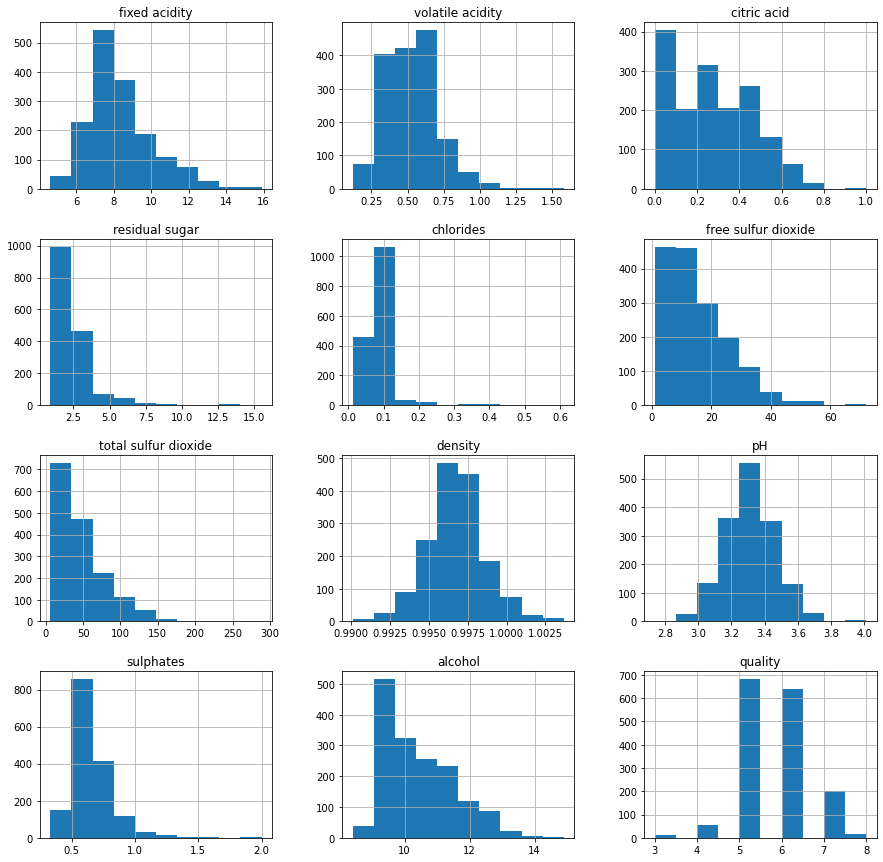

In [8]:
# histogram dla każdej wartości

def print_hist(df):
    df.hist(figsize = (15,15))

print_hist(df)

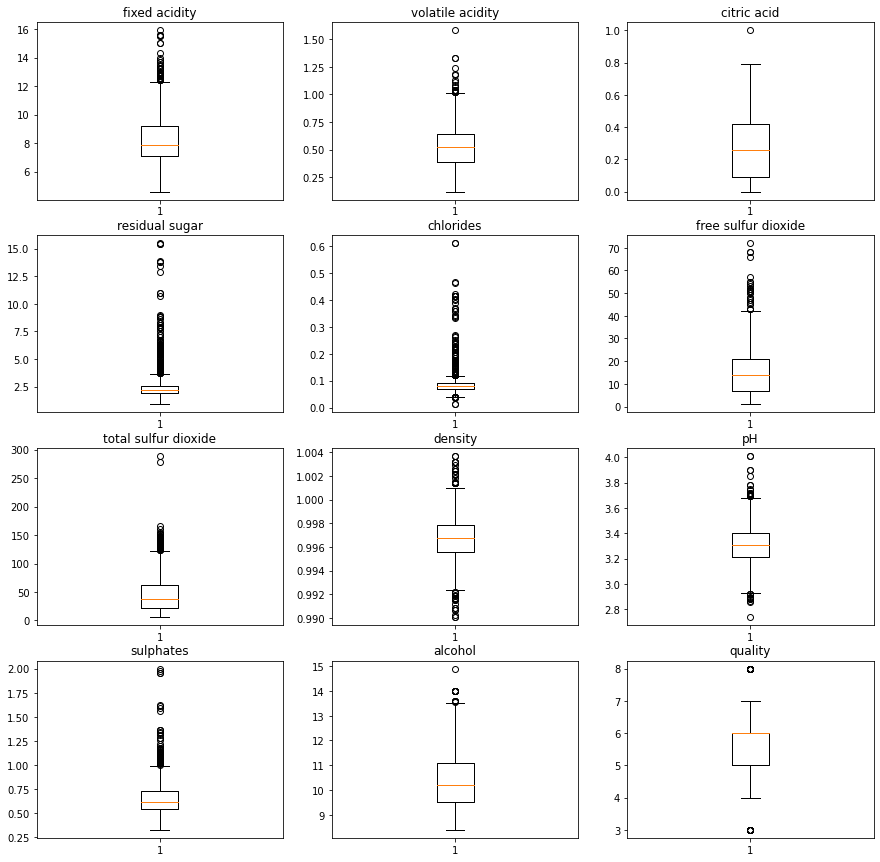

In [9]:
# wykres pudełkowy dla każdej wartości

# parametr n steruje zakresem wąsów

def print_box_plots(df, n):
    fig, axs = plt.subplots(4, 3, figsize = (15, 15))
    
    p = 0

    for i in range(4):
        for j in range(3):
            axs[i][j].boxplot(df[params[p]], whis = n)
            axs[i][j].set_title(params[p])
            p += 1

    plt.show()
    
print_box_plots(df, 1.5)

# 2. Czyszczenie danych

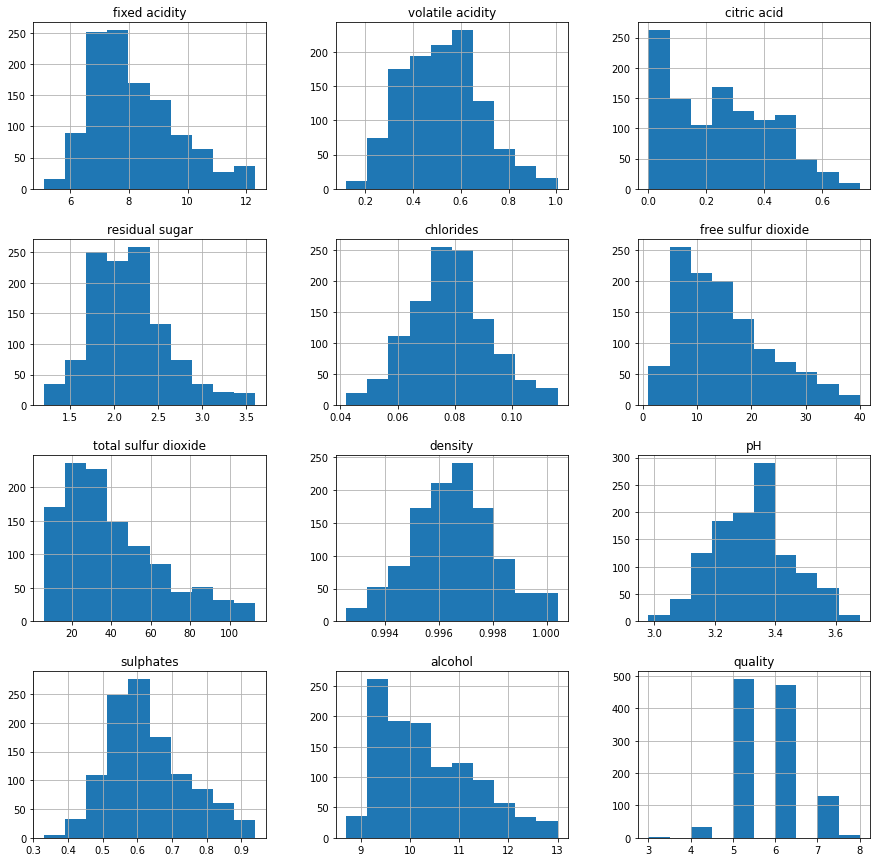

In [10]:
# usuwanie wartości odstających

class Cleaner:
    def __init__(self, df, n):
        self.df = df
        self.n = n
    
    def remove_outliers(self, key):
        series = self.df[key]
        
        # wyznaczamy pierwszy kwartyl
        q1 = series.quantile(0.25)
        
        # wyznaczamy trzeci kwartyl
        q3 = series.quantile(0.75)
        
        # wyznaczamy rozstęp ćwiartkowy
        iqr = q3-q1
        
        # usuwamy wartości skrajne
        self.df = self.df.loc[(series > q1-self.n*iqr) & (series < q3+self.n*iqr)]
        return self.df
    
cleaner = Cleaner(df, 1.5)
# usuwamy wartości odstające dla wszystkich kolumn poza quality

for p in params:
    if p != 'quality':
        df = cleaner.remove_outliers(p)
        
print_hist(df)

# 3. Normalizacja

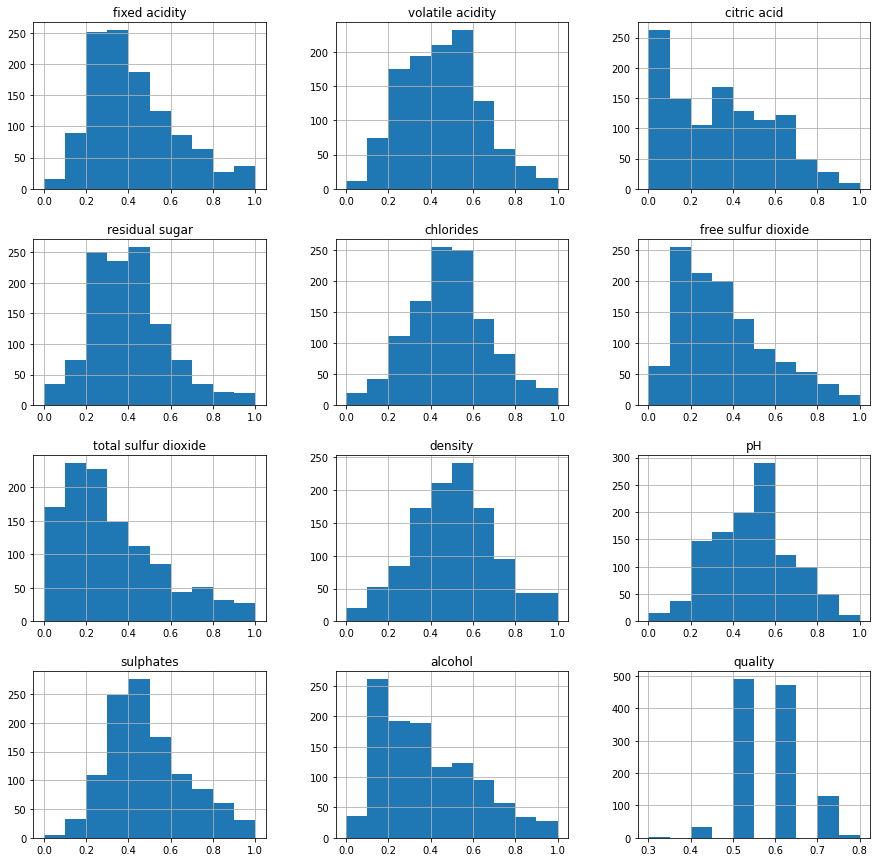

In [11]:
# normalizacja
# chcemy aby każdy parametr znalazł się w zakresie 0-1
class Normalizer:
    def __init__(self, df):
        self.df = df
        
    def normalize(self, key):
        series = self.df[key]
        
        # wyznaczamy minimum maximum i rozstęp
        maximum = series.max()
        minimum = series.min()
        
        gap = maximum-minimum
        
        # wykonujemy działanie
        self.df[key] = self.df[key].apply(lambda x: (x-minimum)/gap)
        return self.df

normalizer = Normalizer(df)

for p in params:
    if p != 'quality':
        df = normalizer.normalize(p)
        
df['quality'] = df['quality'].apply(lambda x: x*0.1)
        
print_hist(df)

In [12]:
# sprawdzamy czy normalizacja się powiodła

for p in params:
    assert df[p].max() <= 1
    assert df[p].min() >= 0

# 4. Macierz korelacji

In [13]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.497879
sulphates               0.434908
citric acid             0.239435
fixed acidity           0.130647
residual sugar          0.041729
free sulfur dioxide    -0.003130
pH                     -0.088971
chlorides              -0.178778
total sulfur dioxide   -0.189932
density                -0.206228
volatile acidity       -0.365390
Name: quality, dtype: float64

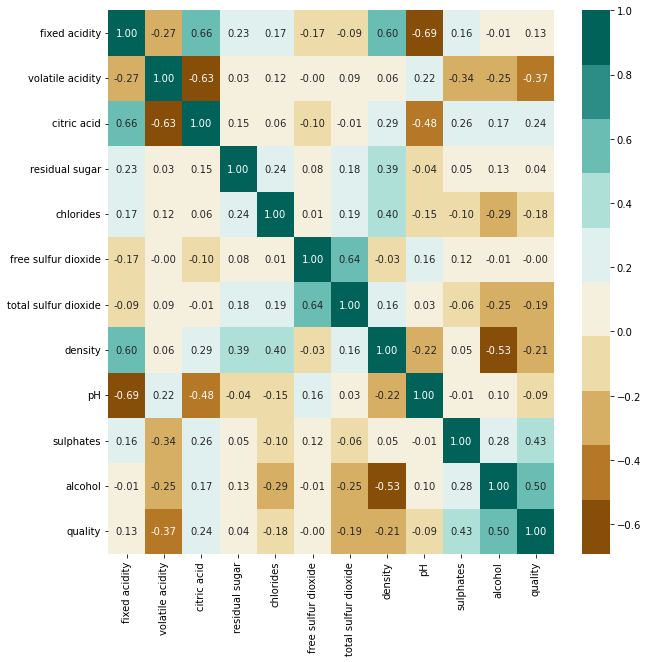

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")

plt.show()

# 5. Dalsze przetowrzenie danych

In [15]:
# Usunięcie kolumn mających znikomy wpływ na szukany parametr

df = df.drop("residual sugar", axis=1)
df = df.drop("pH", axis=1)
df = df.drop("free sulfur dioxide", axis=1)

In [16]:
# Zmiana kolumny quality na postać binarną 1(0.3 - 0.5) - złe wino, 0(0.6 - 0.8) - dobre wino

reduced = True

if reduced:
    df["quality"] = df["quality"].apply(lambda x: int(x + .4))

In [17]:
# Podzielenie danych na zestaw treningowy i testowy

x = df.drop("quality", axis=1).to_numpy()
y = df.loc[:, "quality"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2137) 

# 6. Funkcja do trenowania i mierzenia skutecznośći modelu

In [18]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenowanie modelu
    classifier.fit(feature_vector_train, label)
    
    # wygenerowanie przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # ewaluacja modelu na podstawie danych testowych
    score_vals = []
    if reduced:
        scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
        score_vals = [
            scores[0][0],
            scores[1][0],
            scores[2][0]
        ]
        score_vals.append(metrics.accuracy_score(predictions, y_test))
    else:
        score_vals.append(metrics.mean_squared_error(predictions, y_test))
    return score_vals

# 7. Trenowanie modelów

In [19]:
# MODEL 1 - regresja logistyczna

y_train1 = y_train
if not reduced:
    y_train1 = (y_train * 10).astype(int)

accuracy = train_model(linear_model.LogisticRegression(max_iter=7500), X_train, y_train1, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.71, 0.6893203883495146, 0.6995073891625615, 0.7312775330396476]


In [20]:
# MODEL 2 - Support Vector Machine
# Fine tunning

accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

accuracy = train_model(svm.SVC(degree=12), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.75, 0.635593220338983, 0.6880733944954127, 0.7004405286343612]
SVM kernel='sigmoid' [0.58, 0.5420560747663551, 0.5603864734299516, 0.5991189427312775]
SVM degree=4 [0.8, 0.6896551724137931, 0.7407407407407408, 0.7533039647577092]


In [21]:
# MODEL 3 - Random Forest Tree
# Fine tunning

accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=100), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=1000), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy"), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.81, 0.7297297297297297, 0.7677725118483413, 0.7841409691629956]
RF:  [0.81, 0.7232142857142857, 0.7641509433962265, 0.7797356828193832]
RF:  [0.78, 0.7155963302752294, 0.7464114832535885, 0.7665198237885462]


In [22]:
# MODEL 3 - Neural network

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), max_iter=10000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.73, 0.6636363636363637, 0.6952380952380953, 0.7180616740088106]
